In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Load Dataset
badges = pd.read_csv("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/data/raw/badges.csv")
founders = pd.read_csv("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/data/raw/founders.csv")
companies = pd.read_csv("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/data/raw/companies.csv")
industries = pd.read_csv("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/data/raw/industries.csv")
regions = pd.read_csv("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/data/raw/regions.csv")
schools = pd.read_csv("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/data/raw/schools.csv")
prior_companies = pd.read_csv("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/data/raw/prior_companies.csv")

## Distribution of Founders 

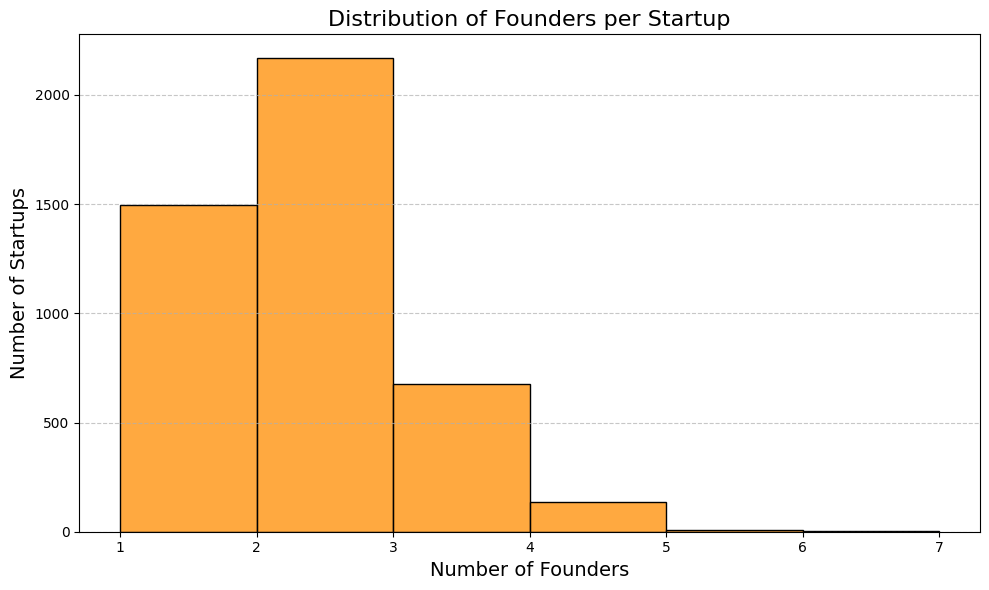

In [53]:
founder_counts = founders.groupby("company_slug").size()

plt.figure(figsize=(10, 6))
sns.histplot(
    founder_counts, 
    bins=range(1, founder_counts.max() + 2), 
    kde=False, 
    color="darkorange"
)
plt.title("Distribution of Founders per Startup", fontsize=16)
plt.xlabel("Number of Founders", fontsize=14)
plt.ylabel("Number of Startups", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/1-eda/figures/founder_distribution.png", dpi=300)
plt.show()

Most startups are founded by a pair of founders (NumberofFounders = 2). 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example Founders DataFrame
data = {
    "Founder": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "TopCompanyBadge": ["TRUE", "FALSE", "TRUE", "FALSE", "TRUE"]
}

# Create the DataFrame
founders_df = pd.DataFrame(data)

# Count the occurrences of TRUE and FALSE in the TopCompanyBadge column
top_company_counts = founders_df["TopCompanyBadge"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
top_company_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    labels=["True", "False"], 
    colors=["#66c2a5", "#fc8d62"],
    explode=(0.1, 0)
)
plt.title("Top Company Badge Analysis")
plt.ylabel("")  # Remove y-axis label for clarity
plt.show()


## Geographical Distributions
### by Region, Country, and State

In [54]:
#Region column contains countries
country_to_region = {
    # America / Canada
    "United States of America": "America / Canada",
    "Canada": "America / Canada",
    "Puerto Rico": "America / Canada",
    # Europe
    "France": "Europe",
    "Germany": "Europe",
    "United Kingdom": "Europe",
    "Portugal": "Europe",
    "Switzerland": "Europe",
    "Denmark": "Europe",
    "Italy": "Europe",
    "Sweden": "Europe",
    "Slovakia": "Europe",
    "Spain": "Europe",
    "Belarus": "Europe",
    "Iceland": "Europe",
    "Finland": "Europe",
    "Austria": "Europe",
    "Armenia": "Europe",
    # South Asia
    "India": "South Asia",
    # Africa
    "Nigeria": "Africa",
    "Rwanda": "Africa",
    "Egypt": "Africa",
    "Senegal" : "Africa",
    "Benin": "Africa",
    "Ethiopia": "Africa",
    "Uganda": "Africa",
    "Tanzania": "Africa",
    # Southeast Asia
    "Indonesia": "Southeast Asia",
    "Philippines": "Southeast Asia",
    "Vietnam": "Southeast Asia",
    "Thailand": "Southeast Asia",
    # Oceania
    "Australia": "Oceania",
    # Latin America
    "Chile": "Latin America",
    "Brazil": "Latin America",
    "Mexico": "Latin America",
    "Colombia": "Latin America",
    # Middle East
    "Israel": "Middle East and North Africa",
    "United Arab Emirates": "Middle East and North Africa",
    # East Asia
    "China": "East Asia",
    "Turkey": "East Asia",
    "South Korea": "East Asia",
    "Malaysia": "Southeast Asia",
    "Singapore": "Southeast Asia",
    # Fully Remote or Other
}
regions["region"] = regions["region"].replace(country_to_region)

def extract_city_state(address):
    if "USA" in str(address):
        parts = address.split(",")
        city = parts[0].strip() if len(parts) > 0 else None
        return city
    return None

regions["city"] = regions["address"].apply(extract_city_state)
print(regions)

      Unnamed: 0       id            region                   country  \
0              0    379.0  America / Canada  United States of America   
1              1    378.0  America / Canada  United States of America   
2              2    375.0  America / Canada  United States of America   
3              3    374.0  America / Canada  United States of America   
4              4    373.0  America / Canada  United States of America   
...          ...      ...               ...                       ...   
4839        4839  29387.0  America / Canada  United States of America   
4840        4840  29349.0            Europe            United Kingdom   
4841        4841  29327.0  America / Canada  United States of America   
4842        4842  29296.0  America / Canada  United States of America   
4843        4843  29251.0  America / Canada  United States of America   

                     address           city  
0     San Francisco, CA, USA  San Francisco  
1         Cambridge, MA, USA   

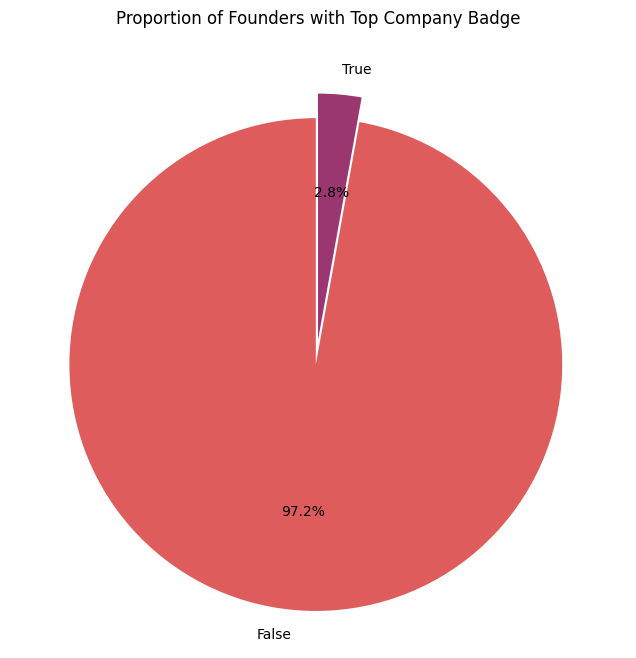

top_company
False    8225
True      240
Name: count, dtype: int64

In [ ]:
top_company_counts = founders["top_company"].value_counts()
plt.figure(figsize=(8, 8))

top_company_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    labels=["False", "True"], 
    colors=sns.color_palette("flare", n_colors=2),
    explode=(0.1, 0)
)
plt.title("Proportion of Founders with Top Company Badge")
plt.ylabel("")
plt.savefig("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/1-eda/figures/top_company_proportion.png", dpi=300)

plt.show()

/var/folders/5m/cnfn53b56j56_vqxvwq4djgc0000gn/T/ipykernel_39277/3457872927.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


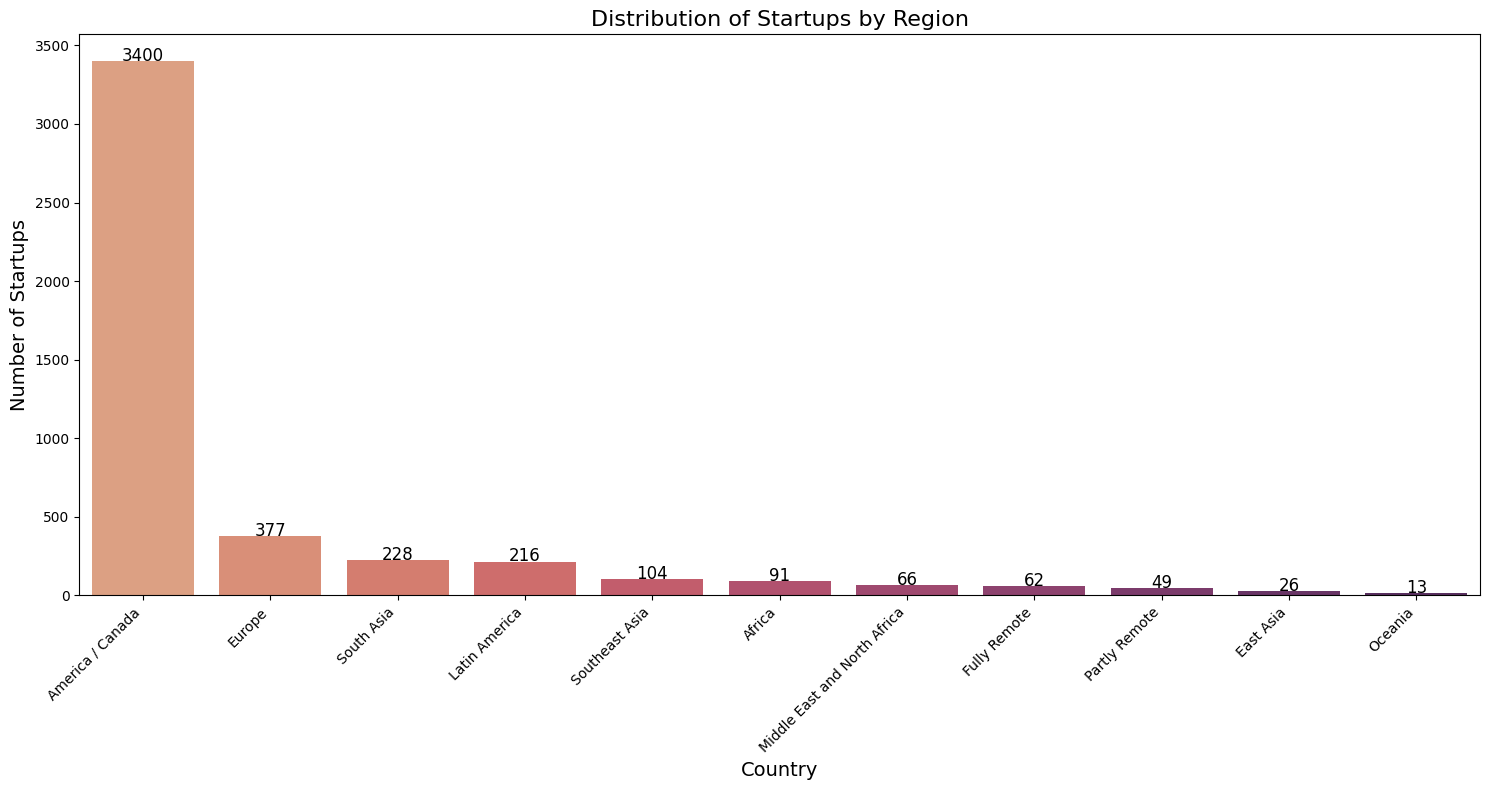

In [55]:
region_counts = regions['region'].value_counts()

plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    x=region_counts.index, 
    y=region_counts.values, 
    palette="flare"
)

for index, value in enumerate(region_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=12, color="black")

plt.title("Distribution of Startups by Region", fontsize=16, color="black")
plt.xlabel("Country", fontsize=14, color="black")
plt.ylabel("Number of Startups", fontsize=14, color="black")
plt.xticks(rotation=45, ha="right", color="black")
plt.yticks(color="black")
plt.tight_layout()

plt.savefig("/Users/alishasrivastava/Predicitng-YCStartup-Peformance/1-eda/figures/region_distribution.png", dpi=300)
plt.show()